In [2]:
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def process_annots_uva(annots, accel):
    #annots[:, 0] = time_to_index(accel, annots[:, 0])
    annot_count = len(annots)
    flags = np.ones((annot_count,))
    for i in range(annot_count):
        if 1 <= annots[i, 1] < 400:
            annots[i, 1] = 1
        elif 400 <= annots[i, 1] < 1000:
            annots[i, 1] = 2
        else:
            print("XXXXXXX UVA annot Problem XXXXXXXXXXX")
            
        if i>=1 and annots[i,0] - annots[i-1, 0]<=1:
            flags[i] = 0 
    
    #print(np.sum(flags))
    annots = annots[flags==1, :]
    #annots = annots.astype(float)
    return annots
    

def read_data_uva_lab():
    print("Reading data UVA lab")
    path = 'C:\\ASM\\DevData\\eating\\our_data\\lab_data\\'
    data = []
    for i in range(35):        
        accel = np.genfromtxt(path + "accel_"+str(i), delimiter=',')
        #print(accel.shape)
        #print(accel[:10, :])
        print("\nSession ", str(i), " Before process >> Duration: ", str(accel[0, 0]), " - ", str(accel[-1, 0]), ", Count: "+str(len(accel)) )         
        
        
        #accel = resample(accel, sampling_rate)
        #print(accel[:10, :])
        #accel[:, 1:] = smooth_data(accel[:, 1:], smooth_factor)
        #print("Session ", str(i), " After process >> Duration: ", str(accel[0, 0]), " - ", str(accel[-1, 0]), ", Count: "+str(len(accel)) )         
        #print(accel[:10, :])
          
        annots = np.genfromtxt(path+"annot_"+str(i), delimiter=',') 
        annots = process_annots_uva(annots, accel)
        print("Session ", str(i), " Annots >> Duration: ", str(annots[0, 0]), " - ", str(annots[-1, 0]), ", Count: "+str(len(annots)) )         
                
        #print(annots[:10, :])
        
        dsess = [accel, annots]        
        dsubject = [dsess]        
        data.append(dsubject)
        
    
    #dm.save_data(data, "uva_lab_data", "data")            
    return data
    

In [38]:
d = read_data_uva_lab()

Reading data UVA lab

Session  0  Before process >> Duration:  0.0  -  2519.98784 , Count: 151894
Session  0  Annots >> Duration:  103.2  -  2149.0 , Count: 102

Session  1  Before process >> Duration:  0.0  -  2107.51442 , Count: 127874
Session  1  Annots >> Duration:  131.7  -  2053.6 , Count: 115

Session  2  Before process >> Duration:  0.0  -  2190.18375 , Count: 136694
Session  2  Annots >> Duration:  135.7  -  2114.4 , Count: 81

Session  3  Before process >> Duration:  0.0  -  2111.33028 , Count: 129059
Session  3  Annots >> Duration:  57.7  -  2082.6 , Count: 75

Session  4  Before process >> Duration:  0.0  -  2002.7103 , Count: 122886
Session  4  Annots >> Duration:  79.1  -  1976.7 , Count: 126

Session  5  Before process >> Duration:  0.0  -  2024.74561 , Count: 124080
Session  5  Annots >> Duration:  52.8  -  2004.7 , Count: 151

Session  6  Before process >> Duration:  0.0  -  2342.85 , Count: 145624
Session  6  Annots >> Duration:  145.2  -  2271.3 , Count: 72

Session 

[[2519.98784], [2107.51442], [2190.18375], [2111.33028], [2002.7103], [2024.74561], [2342.85], [2124.7812], [2039.04692], [2268.45674], [1974.62303], [2093.16144], [2080.66711], [2143.68695], [986.70544], [494.64496], [1159.74628], [750.45178], [1093.57324], [972.70899], [2979.65387], [762.75269], [481.34348], [819.91122], [510.69824], [908.36389], [449.82248], [280.17062], [562.96516], [1114.92633], [567.96233], [519.03874], [451.77249], [489.62161], [599.49402]]
22.371463547619047
Total annots: 2454 1766 688


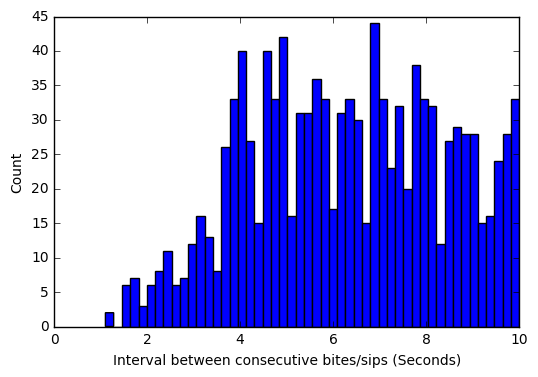

In [46]:
durations = []
annots_all = np.empty((0, 2))
all_diff = []
for subject in range(len(d)):
    subject_data = d[subject]
    for sess in range(len(subject_data)):
        accel = d[subject][sess][0]
        durations.append([accel[-1,0]])
        annots = d[subject][sess][1]
        annots_all= np.concatenate((annots_all, annots))        
        a = annots[:, 0]
        diff = np.diff(a)
        all_diff = np.concatenate((all_diff, diff))
        
print(durations)
print(np.mean(durations)/60)
a = annots_all        
print("Total annots:", len(a), len(a[a[:,1]==1, :]), len(a[a[:,1]==2, :]))

all_diff = all_diff[all_diff<=10]

fig, ax = plt.subplots()
plt.hist(all_diff, bins=50)
plt.xlim([0, 10])
plt.xlabel('Interval between consecutive bites/sips (Seconds)')
plt.ylabel('Count')
        
